# Play with Data

In [ ]:
library(MuData)
library(SummarizedExperiment)

In [177]:
library(dplyr)
library(ggplot2)
library(tibble)

In [3]:
inference_data_path <- "/mnt/shared/inference"

In [5]:
mudata_input_fp <- paste0(inference_data_path, "/gasperini_inference_input_minimal.h5mu")
input_minimal <- readH5MU(mudata_input_fp)
input_minimal

Warning message:
“sampleMap[['assay']] coerced with as.factor()”


A MultiAssayExperiment object of 2 listed
 experiments with user-defined names and respective classes.
 Containing an ExperimentList class object of length 2:
 [1] gene: SummarizedExperiment with 112 rows and 9704 columns
 [2] guide: SummarizedExperiment with 55 rows and 9704 columns
Functionality:
 experiments() - obtain the ExperimentList instance
 colData() - the primary/phenotype DataFrame
 sampleMap() - the sample coordination DataFrame
 `$`, `[`, `[[` - extract colData columns, subset, or experiment
 *Format() - convert into a long or wide DataFrame
 assays() - convert ExperimentList to a SimpleList of matrices
 exportClass() - save data to flat files

In [6]:
input_minimal[['gene']]

class: SummarizedExperiment 
dim: 112 9704 
metadata(0):
assays(1): ''
rownames(112): ENSG00000008853 ENSG00000104679 ... ENSG00000198899
  ENSG00000228253
rowData names(0):
colnames(9704): GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
  AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3 ... GGATTACCATGTTGAC-1_2A_4_SI-GA-G5
  GTGCTTCTCGGATGTT-1_2A_1_SI-GA-G2
colData names(0):

In [77]:
assayNames(input_minimal[['gene']]) <- 'counts'
input_minimal[['gene']]

class: SummarizedExperiment 
dim: 112 9704 
metadata(0):
assays(1): counts
rownames(112): ENSG00000008853 ENSG00000104679 ... ENSG00000198899
  ENSG00000228253
rowData names(0):
colnames(9704): GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
  AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3 ... GGATTACCATGTTGAC-1_2A_4_SI-GA-G5
  GTGCTTCTCGGATGTT-1_2A_1_SI-GA-G2
colData names(0):

In [68]:
assay(input_minimal[['gene']], 'counts')[1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
                GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
ENSG00000008853                                .
ENSG00000104679                                2
ENSG00000104689                                .
                AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3
ENSG00000008853                                .
ENSG00000104679                                .
ENSG00000104689                                2
                CCCAATCTCCTCAATT-1_1B_1_SI-GA-F2
ENSG00000008853                                .
ENSG00000104679                                1
ENSG00000104689                                .

In [78]:
guide_data <- rowData(input_minimal[['guide']])
#dim(guide_data)
#head(guide_data)

nontarg_guides <- data.frame(guide_data) %>%
filter(targeting==FALSE) %>%
row.names()

nontarg_guides

[1] "GACCTCCTGTGATCAGGTGG" "ATTGGTATCCGTATAAGCAG" "TCTAATCTCAGCTACTTGGG"
 [4] "AGATACCTATGGCCATATAG" "GTAGCTTTATGAGAACCACT" "AATATTCTCCCTCATTCTGG"
 [7] "TATCTCAGAGTACTATTCCA" "GCGAACAGCGAGGGCCCCTG" "TGTTGTGAGAGCATCCGGAG"
[10] "GCAAATGCTTCATCACCCCA" "ATTGGCAGTCTCTAAGAAGT" "TCCGCAGTCAAAAGACCGAG"
[13] "CGAAGGATCAAAGCGACTTT" "AGTTCTAGAGCACTGAGCAA" "AATCATGGTGGAAGGTGAAG"
[16] "CCATAAAGAATTCGGTGTAG" "TCTGCTAAACTGCCTACACA" "TCTTGGCCTGCTTGGTGTCT"
[19] "GGGGACTTGCTCCAGGACGG" "CGAGTTGTAAGCCCTTAAAA" "TGAACAATACTCCAGTACAT"
[22] "CCACCTTCGAAGTCCGTATG" "GTAGCCTCTGTTCCTCAGTA" "AATCCTCTAATGGACGAAGA"
[25] "ATATTCAGCAGCTAAAGCAT"

In [82]:
assayNames(input_minimal[['guide']])[[1]] <- 'counts'
input_minimal[['guide']]

class: SummarizedExperiment 
dim: 55 9704 
metadata(2): capture_method moi
assays(2): counts guide_assignment
rownames(55): ATGTAGAAGGAGACACCGGG GCGCAGAGGCGGATGTAGAG ...
  AATCCTCTAATGGACGAAGA ATATTCAGCAGCTAAAGCAT
rowData names(2): targeting intended_target_name
colnames(9704): GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
  AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3 ... GGATTACCATGTTGAC-1_2A_4_SI-GA-G5
  GTGCTTCTCGGATGTT-1_2A_1_SI-GA-G2
colData names(0):

In [93]:
#get the cell IDs that got a certain guide
grna_ids <- nontarg_guides
sparse_guide_matrix <- assay(input_minimal[['guide']], 'counts')[grna_ids, ]

# Compute column sums
col_sums <- colSums(sparse_guide_matrix)

# Identify columns with non-zero sum
columns_with_nonzero <- names(col_sums[col_sums > 0])
length(columns_with_nonzero)

#non-targeting gRNA expression matrix
nontargeting_mat <- assay(input_minimal[['gene']], 'counts')[, columns_with_nonzero]
dim(nontargeting_mat)
nontargeting_mat[1:3, 1:3]

[1] 4237

[1]  112 4237

3 x 3 sparse Matrix of class "dgCMatrix"
                CCCAATCTCCTCAATT-1_1B_1_SI-GA-F2
ENSG00000008853                                .
ENSG00000104679                                1
ENSG00000104689                                .
                GGACGTCTCATGTCTT-1_1B_8_SI-GA-F9
ENSG00000008853                                .
ENSG00000104679                                .
ENSG00000104689                                .
                CACTCCAAGCGTAGTG-1_1A_2_SI-GA-E3
ENSG00000008853                                .
ENSG00000104679                                .
ENSG00000104689                                .

In [195]:
## get gRNA that made it into each cell
sparse_guide_matrix <- assay(input_minimal[['guide']], 'counts')

# Find the rowname with the maximum number of reads for each column (sample barcode)
max_rownames <- rownames(sparse_guide_matrix)[apply(sparse_guide_matrix, 2, which.max)]

# Find the maximum number of reads for each column (sample barcode)
max_reads <- apply(sparse_guide_matrix, 2, max)

# Create a dataframe with sample barcode IDs, corresponding rownames with max reads, and max reads
max_guide_reads_df <- data.frame(
  BarcodeID = colnames(sparse_guide_matrix),
  MaxGuideRow = max_rownames,
  MaxGuideReads = max_reads
)

## project PCs into non-targeting PCA space
# Run PCA
non_targ_pca_result <- prcomp(scale(t(as.matrix(nontargeting_mat))))
loadings <- non_targ_pca_result$rotation[, 1:2]

#project full matrix onto non-targ PCA space
full_matrix <- scale(t(assay(input_minimal[['gene']], 'counts')))
projected_data <- full_matrix %*% loadings

plot_pc_data <- data.frame(
    BarcodeID = rownames(projected_data),
  PC1 = projected_data[, 1],
  PC2 = projected_data[, 2]
)

join_guide_data <- as.data.frame(guide_data) %>%
mutate(MaxGuideRow = rownames(.))


## join the PC result with the gRNA
plot_pc_data <- plot_pc_data %>%
left_join(max_guide_reads_df) %>%
left_join(join_guide_data)

## Look at the DF
head(plot_pc_data)

Joining with `by = join_by(BarcodeID)`
Joining with `by = join_by(MaxGuideRow)`


,BarcodeID,PC1,PC2,MaxGuideRow,MaxGuideReads,targeting,intended_target_name
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2,1.3728798,-0.02686799,GCCCTGCTACCCACTTACAG,9,TRUE,ENSG00000113552
2,AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3,-2.0529482,0.24918940,GAGAGAGCCGGCGGCCAGTG,18,TRUE,ENSG00000163866
3,CCCAATCTCCTCAATT-1_1B_1_SI-GA-F2,3.9776543,-7.52187052,AATCCTCTAATGGACGAAGA,24,FALSE,non-targeting
4,CGCGGTACACTGTCGG-1_1A_2_SI-GA-E3,-0.8226152,0.84861443,CGGAAGTCGCCGCACCCAGG,26,TRUE,ENSG00000163866
5,GGACGTCTCATGTCTT-1_1B_8_SI-GA-F9,-1.3653869,-1.08247107,TATCTCAGAGTACTATTCCA,12,FALSE,non-targeting
6,TCAGCTCTCCTAGGGC-1_1B_6_SI-GA-F7,-1.6254093,0.40748457,TGCCGGGCGAGCACCGTTAG,34,TRUE,ENSG00000122644


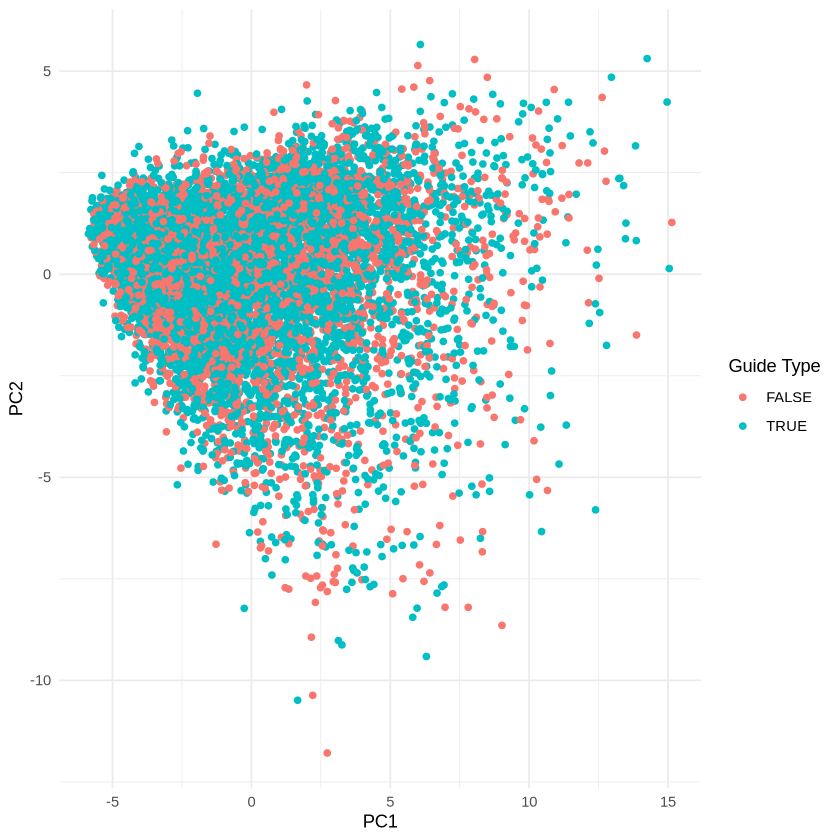

In [196]:
ggplot(plot_pc_data, aes(x = PC1, y = PC2, color = targeting)) +
  geom_point() +
  labs(x = "PC1", y = "PC2", color = "Guide Type") +
  theme_minimal()